<a href="https://colab.research.google.com/github/jedkk/cat_n_dog/blob/main/cat_dog_im_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 100
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=40,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode='nearest'
                                           )
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    color_mode="rgb"
)
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb'
)
test_data_gen = test_image_generator.flow_from_directory(
    '/content/cats_and_dogs',
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    classes=['test']
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


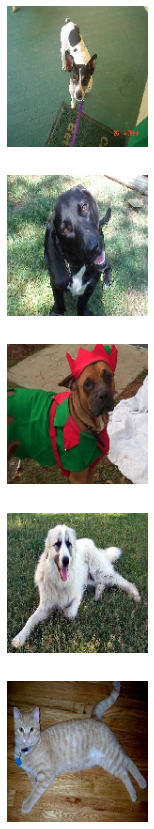

In [ ]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])
#sample_training_images[90].shape

Found 2000 images belonging to 2 classes.


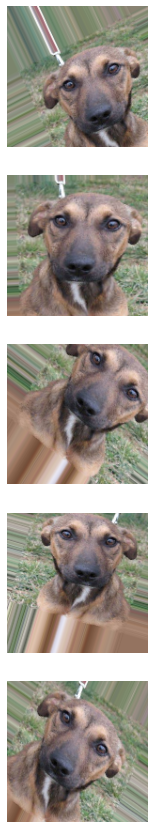

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# model creation
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))) # check shape of each image -> (150, 150, 3)
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)       

Use the `fit` method on your `model` to train the network. Make sure to pass in arguments for `x`, `steps_per_epoch`, `epochs`, `validation_data`, and `validation_steps`.

In [ ]:
STEP_SIZE_TRAIN = train_data_gen.n // train_data_gen.batch_size
STEP_SIZE_VALID = val_data_gen.n // val_data_gen.batch_size
history = model.fit(x=train_data_gen, epochs=epochs, steps_per_epoch=STEP_SIZE_TRAIN,
                validation_data=val_data_gen, validation_steps=STEP_SIZE_VALID)

Epoch 1/100
15/15 [==============================] - 16s 1s/step - loss: 0.7878 - accuracy: 0.5055 - val_loss: 0.6933 - val_accuracy: 0.5011
Epoch 2/100
15/15 [==============================] - 15s 1s/step - loss: 0.6934 - accuracy: 0.5090 - val_loss: 0.6928 - val_accuracy: 0.4978
Epoch 3/100
15/15 [==============================] - 15s 990ms/step - loss: 0.6927 - accuracy: 0.5057 - val_loss: 0.6934 - val_accuracy: 0.5045
Epoch 4/100
15/15 [==============================] - 15s 1s/step - loss: 0.6932 - accuracy: 0.5178 - val_loss: 0.6921 - val_accuracy: 0.5212
Epoch 5/100
15/15 [==============================] - 15s 983ms/step - loss: 0.6925 - accuracy: 0.5094 - val_loss: 0.6912 - val_accuracy: 0.5011
Epoch 6/100
15/15 [==============================] - 15s 994ms/step - loss: 0.6946 - accuracy: 0.4959 - val_loss: 0.6924 - val_accuracy: 0.5502
Epoch 7/100
15/15 [==============================] - 15s 1s/step - loss: 0.6923 - accuracy: 0.5216 - val_loss: 0.6904 - val_accuracy: 0.5424
Epoc

Run the next cell to visualize the accuracy and loss of the model.

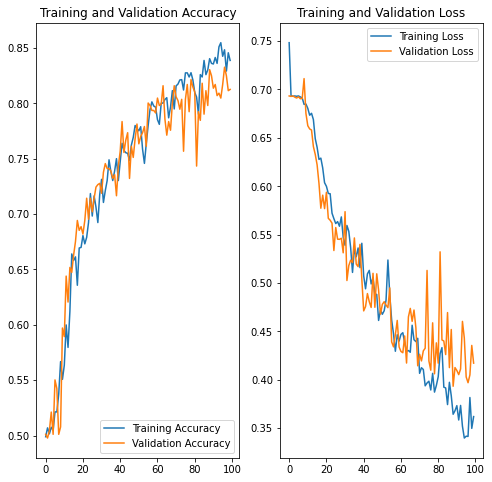

In [ ]:
# Plot of accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Evaluate
model.evaluate(val_data_gen, steps=STEP_SIZE_VALID)

7/7 [==============================] - 2s 328ms/step - loss: 0.4365 - accuracy: 0.8058


[0.4365391433238983, 0.8058035969734192]

Using model to predict whether a brand new image is a cat or a dog...

[0.8098001, 0.029430233, 0.0040505407, 0.94101864, 0.032052938, 0.3974445, 0.076312356, 0.0159817, 0.95851326, 0.9990428, 0.004898337, 0.9996251, 0.14537634, 0.99234176, 0.078402095, 0.9922651, 0.7134423, 0.86692524, 0.66426975, 0.9871039, 0.0018714365, 0.20008732, 0.9452531, 0.9267285, 0.79114896, 0.063339844, 0.909975, 0.0577707, 0.03760414, 0.6436761, 0.0051249177, 0.007570789, 0.93437326, 0.5488761, 0.042197194, 0.5404209, 0.99957734, 0.9387792, 0.32618728, 0.13033096, 0.08789738, 0.047863953, 0.9909099, 0.8126936, 0.01210144, 0.15121998, 0.76299936, 0.0019839033, 0.061517783, 0.03690331]


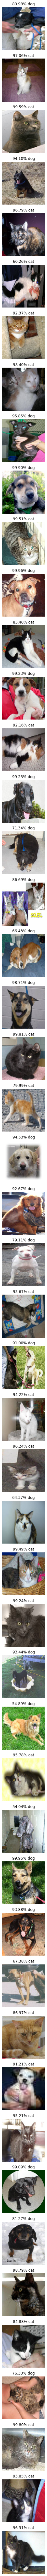

In [ ]:
probabilities = list(map(lambda x: x[0], model.predict(test_data_gen)))
print(probabilities)
plotImages([test_data_gen[i][0] for i in range(50)], probabilities=probabilities)

Accuracy check

In [ ]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified*100, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 88.0% of the images of cats and dogs.
You passed the challenge!
